In [126]:
import numpy as np
import pandas as pd
import warnings 

In [ ]:
warnings.filterwarnings("ignore")

In [98]:
# get movie dataset

column_names = ["user_id", "movie id", "rating", "timestamp"]

# dataset is sepreated by tab and it has no header (column name)
rating_data = pd.read_csv('ml-100k/u.data', sep = '\t', names = column_names)

In [99]:
rating_data.head()

,user_id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [87]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [88]:
rating_data['item_id'].unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641], dtype=int64)

In [89]:
# the above data does not contain movie (item) meta data like movie title, relase data, and more.

In [441]:
# get movie item details
columns = ["movie id", "movie title", "release date", "video release date",
              "IMDb URL", "unknown", "Action", 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              "Film-Noir", "Horror", 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
movie_df = pd.read_csv('ml-100k/u.item', sep = '\|', names=columns)

<ipython-input-441-94960d2d9e49>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_df = pd.read_csv('ml-100k/u.item', sep = '\|', names=columns)


In [442]:
movie_df.isnull().sum()

movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [443]:
movie_df.drop(columns=['video release date', 'unknown'], inplace=True)

In [444]:
movie_df.set_index('movie id', inplace=True)

In [445]:
movie_df.head()

,movie title,release date,IMDb URL,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [450]:
genres = []
for mid in range(movie_df.shape[0]):
     genres.append([movie_df.iloc[mid][x] for x in range(4, movie_df.shape[1])])
        
movie_df['genres'] = genres

"genres = []\nfor mid in range(movie_df.shape[0]):\n     genres.append([movie_df.iloc[mid][x] for x in range(4, movie_df.shape[1])])\n        \nmovie_df['genres'] = genres"

In [446]:
movie_df['genres'] = movie_df.iloc[:, 4:].apply(lambda x: x.tolist(), axis=1)

In [447]:
movie_df.drop(columns=["Action", 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              "Film-Noir", "Horror", 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'], inplace=True)

In [448]:
movie_df

,movie title,release date,IMDb URL,genres
movie id,,,,
1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),"[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ..."
...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ..."
1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [414]:
movie = 'Four Rooms (1995)'

In [449]:
movie_df[movie_df['movie title'] == movie]['genres'].iloc[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [461]:
movie_df['genres'].iloc[0]

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [452]:
sim = []
genre_vec = movie_df[movie_df['movie title'] == movie]['genres'].iloc[0]
for id in range(movie_df.shape[0]):
    s = cosine_similarity([genre_vec], [movie_df['genres'].iloc[id]])
    sim.append(s)

In [453]:
sim

[array([[0.]]),
 array([[0.70710678]]),
 array([[1.]]),
 array([[0.]]),
 array([[0.57735027]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.5]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.5]]),
 array([[0.]]),
 array([[0.70710678]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.70710678]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.57735027]]),
 array([[0.]]),
 array([[0.70710678]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.70710678]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.70710678]]),
 array([[0.70710678]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[0.]]),
 array([[1.]]),
 array([[0.70710678]]),
 array([[0.5]]),
 array([[0.]]),
 arra

In [201]:
# remove genres of one-hot
# also remove release dates as they are not needed for recommendation as the dataset is from 1990-98
movie_df.drop(columns=["release date", "video release date", "unknown", "Action", 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              "Film-Noir", "Horror", 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'], inplace=True)

In [202]:
movie_df.head()

,movie id,movie title,IMDb URL,genres
0,1,Toy Story (1995),http://us.imdb.com/M/title-exact?Toy%20Story%2...,001110000000000000
1,2,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...,110000000000000100
2,3,Four Rooms (1995),http://us.imdb.com/M/title-exact?Four%20Rooms%...,000000000000000100
3,4,Get Shorty (1995),http://us.imdb.com/M/title-exact?Get%20Shorty%...,100010010000000000
4,5,Copycat (1995),http://us.imdb.com/M/title-exact?Copycat%20(1995),000001010000000100


In [104]:
# merge movie_df and rating_data
pd.merge(rating_data, movie_df, on=["movie id"], how='inner')

,user_id,movie id,rating,timestamp,movie title,IMDb URL,genres
0,196,242,3,881250949,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
1,63,242,3,875747190,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
2,226,242,5,883888671,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
3,154,242,3,879138235,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
4,306,242,5,876503793,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),http://us.imdb.com/M/title-exact?Mamma%20Roma%...,000000010000000000
99996,655,1640,3,888474646,"Eighth Day, The (1996)","http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",000000010000000000
99997,655,1637,3,888984255,Girls Town (1996),http://us.imdb.com/M/title-exact?Girls%20Town%...,000000010000000000
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",http://us.imdb.com/M/title-exact?Saimt%20el%20...,000000010000000000


In [108]:
rating_data.drop(columns=["timestamp"], inplace=True)
rating_data.head()

In [110]:
# convert rating_data into user_movie rating data frame
rating_data.nunique()

user_id      943
movie id    1682
rating         5
dtype: int64

# Exploratory Data Analysis

In [111]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [120]:
movie_df = pd.merge(rating_data, movie_df, on=["movie id"], how='inner')

In [127]:
movie_df

,user_id,movie id,rating,movie title,IMDb URL,genres
0,196,242,3,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
1,63,242,3,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
2,226,242,5,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
3,154,242,3,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
4,306,242,5,Kolya (1996),http://us.imdb.com/M/title-exact?Kolya%20(1996),000010000000000000
...,...,...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962),http://us.imdb.com/M/title-exact?Mamma%20Roma%...,000000010000000000
99996,655,1640,3,"Eighth Day, The (1996)","http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",000000010000000000
99997,655,1637,3,Girls Town (1996),http://us.imdb.com/M/title-exact?Girls%20Town%...,000000010000000000
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1...",http://us.imdb.com/M/title-exact?Saimt%20el%20...,000000010000000000


In [128]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   movie id     100000 non-null  int64 
 2   rating       100000 non-null  int64 
 3   movie title  100000 non-null  object
 4   IMDb URL     99987 non-null   object
 5   genres       100000 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.3+ MB


In [129]:
movie_df.describe()

,user_id,movie id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [146]:
# lets check average rating of each movie
movie_df.groupby('movie title').mean()['rating'].sort_values(ascending=False)

movie title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [149]:
# lets see no of users rated each movie
movie_df.groupby('movie title').count()['rating']

movie title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [151]:
# merge average rating and no of ratings per movie
avg_rating = movie_df.groupby('movie title').mean()['rating']
count_rating = movie_df.groupby('movie title').count()['rating']

movie_rating_count = pd.merge(avg_rating, count_rating, how="inner", on=["movie title"])

In [157]:
movie_rating_count.columns = ['avg_rating', 'count_rating']

In [160]:
movie_rating_count.sort_values(by=['count_rating', 'avg_rating'], ascending=False).head(5)

,avg_rating,count_rating
movie title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [162]:
movie_rating_count.sort_values(by=['avg_rating', 'count_rating'], ascending=False).head(5)

,avg_rating,count_rating
movie title,,
Prefontaine (1997),5.0,3
Star Kid (1997),5.0,3
"Saint of Fort Washington, The (1993)",5.0,2
Santa with Muscles (1996),5.0,2
Aiqing wansui (1994),5.0,1


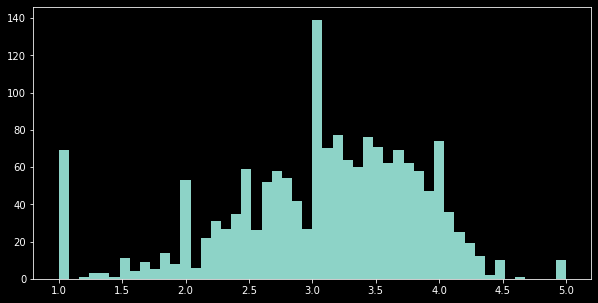

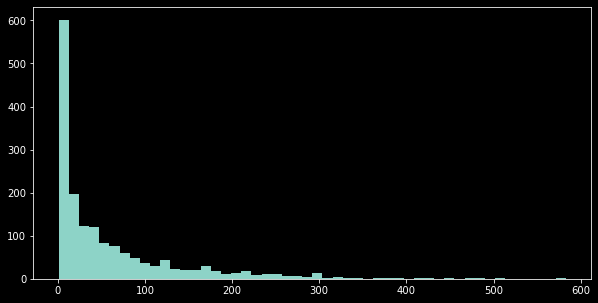

In [173]:
# from the above 2 table, we can see that there are lots of movies which has less no. of user who has rated
# lets visualize this info
plt.style.use("dark_background")

plt.figure(figsize=(10, 5))
plt.hist(movie_rating_count['avg_rating'], bins=50)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(movie_rating_count['count_rating'], bins=50)
plt.show()

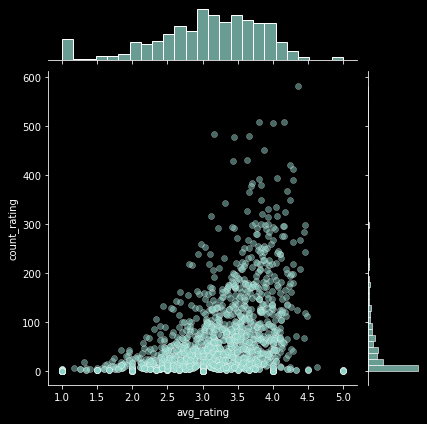

In [176]:
# the histogram of count_rating shows that its not optimal to just ignore the movie with low count_rating
import seaborn as sns
sns.jointplot(x='avg_rating', y='count_rating', data=movie_rating_count, alpha=0.5)
plt.show()

# Recommendation

In [178]:
movie_rating_count.head(5)

,avg_rating,count_rating
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [463]:
users_rating = movie_df.pivot_table(index='user_id', values=['rating'], columns=['movie title'])['rating']

KeyError: 'rating'

In [462]:
user_rating

NameError: name 'user_rating' is not defined

In [259]:
from sklearn.metrics.pairwise import cosine_similarity

In [235]:
movie_df.describe(include=object)

,movie title,IMDb URL,genres
count,1682,1679,1682
unique,1664,1660,216
top,Chairman of the Board (1998),http://us.imdb.com/M/title-exact?Liar+(1997),000000010000000000
freq,2,2,376


In [236]:
movie_df.describe()

,movie id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [266]:
g = movie_df[movie_df['movie title'] == 'Toy Story (1995)'].genres[0]

In [291]:
movie_df[movie_df['genres'] == g]

,movie id,movie title,IMDb URL,genres
0,1,Toy Story (1995),http://us.imdb.com/M/title-exact?Toy%20Story%2...,001110000000000000
421,422,Aladdin and the King of Thieves (1996),http://us.imdb.com/M/title-exact?Aladdin%20and...,001110000000000000


In [287]:
str_num(movie_df.genres)

[1110000000000000,
 110000000000000100,
 100,
 100010010000000000,
 1010000000100,
 10000000000,
 10000001000,
 110010000000000,
 10000000000,
 10000000010,
 1000000000100,
 1000000000100,
 10000000000000,
 10000010000,
 10000000000,
 10000000010000,
 100011000010000100,
 10000000000,
 10000000000,
 10000010000,
 110010000001000100,
 100000010000000010,
 10000000100,
 110001000000000000,
 10000000000000,
 10000000000000,
 100000000000000000,
 100000010000000100,
 110011000000000000,
 10000000000,
 10000000110,
 100000000000,
 100000000000010100,
 10010000000000,
 10100010000000000,
 10000010000,
 10000000000,
 1100,
 100001000000001000,
 10000000000000,
 10000000000000,
 10000000000000,
 10000000100,
 10000000100,
 10010000000000,
 10000000000,
 10010000000000,
 100000000000,
 10000000010000,
 110000000000011010,
 10000010011,
 10000000000,
 100000000000000100,
 100000010000000100,
 1010000010100,
 1010000000000,
 10000000000,
 10000000000,
 10000000000,
 10000000000,
 10000000000,
 11

In [283]:
cosine_similarity(str_num(g), movie_df.genres)

[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# find similar movie
def similar_movies(users_rating_mat, movie_name):
    movie_ratings = users_rating_mat[movie_name] # pd series

In [223]:
def similarMovies(movie_mat, movie_name):
    movie_rating = movie_mat[movie_name]
    movie_corr = movie_mat.corrwith[movie_rating]
    
    movie_corr_df = pd.DataFrame(movie_corr, columns = 'Correlation')
    # movie_corr_df.dropna(inplace = True)
    
    movie_corr_df = movie_corr_df.dropna()
    movie_corr_df = movie_corr_df.join(rating['no. of ratings'])
    similar_movies = movie_corr_df[ movie_corr_df['no. of ratings']>100 ].sort_values('Correlation', ascending = False)
    
    return similar_movies

In [226]:
similar_movies = similarMovies(movie_mat, 'Star Wars (1977)')

TypeError: 'method' object is not subscriptable

In [227]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
star_wars_rating = movie_mat['Star Wars (1977)']

In [233]:
star_wars_corr = movie_mat.corrwith(star_wars_rating)

In [236]:
# attach number of user rated these movies
star_wars_corr_df = pd.DataFrame(star_wars_corr, columns = ['Correlation'])

In [237]:
star_wars_corr_df.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [239]:
star_wars_corr_df.dropna(inplace = True)

In [242]:
star_wars_corr_df.tail()

,Correlation
title,
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182
unknown,0.723123


In [243]:
star_wars_corr_df.sort_values('Correlation', ascending = False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [245]:
star_wars_corr_df = star_wars_corr_df.join(ratings['no. of ratings'])

In [247]:
star_wars_corr_df.head()

,Correlation,no. of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [248]:
star_wars_similar_movies = star_wars_corr_df[ star_wars_corr_df['no. of ratings']>100 ].sort_values('Correlation', ascending = False)

In [249]:
star_wars_similar_movies

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [253]:
def simMovies(movie_name):
    movie_rating = movie_mat[movie_name]
    movie_corr = movie_mat.corrwith(movie_rating)
    
    movie_corr_df = pd.DataFrame(movie_corr, columns = ['Correlation'])
    
    similar_movies = movie_corr_df.join(rating['no. of ratings'])
    similar_movies.dropna(inplace = True)
    
    similar_movies = similar_movies[ similar_movies['no. of ratings']>100 ].sort_values('Correlation', ascending = False)
    
    return similar_movies

In [254]:
simMovies('Star Wars (1977)')

,Correlation,no. of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [262]:
movie_mat.head(5)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [256]:
simMovies('Young Frankenstein (1974)')

,Correlation,no. of ratings
title,,
Young Frankenstein (1974),1.000000,200
Miracle on 34th Street (1994),0.558768,101
Young Guns (1988),0.510284,101
Welcome to the Dollhouse (1995),0.490108,112
Fly Away Home (1996),0.448428,180
...,...,...
Seven Years in Tibet (1997),-0.146984,155
"Game, The (1997)",-0.175071,251
Reservoir Dogs (1992),-0.197162,148


In [257]:
simMovies('12 Angry Men (1957)')

,Correlation,no. of ratings
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
...,...,...
Spawn (1997),-0.385814,143
Multiplicity (1996),-0.428845,134
Down Periscope (1996),-0.432461,101
